In [1]:
import os
import pandas as pd
import openai
import matplotlib.pyplot as plt
import numpy as np
import torch
from transformers import AutoTokenizer, AutoModel
from scipy.spatial.distance import cosine
import re

In [2]:
def csv_reading(path):
    df = pd.read_csv(path)
    df = df.drop(['fk_id'], axis = 1)
    return df

def multi_csv(df1, df2):
    df = pd.merge(df1, df2, on = 'biz_dt', how='outer')
    return df

In [36]:
df1= csv_reading('/home/fastcampus/Test_model /매출 데이터셋/비급여 총매출.csv/동원한의원 비급여 총매출.csv')
df2= csv_reading('/home/fastcampus/Test_model /매출 데이터셋/총진료비.csv/동원한의원 총진료비.csv')
df = multi_csv(df1,df2)
df3 = csv_reading('/home/fastcampus/Test_model /환자수 데이터셋/신규 환자 수.csv/동원한의원 신규 환자 수.csv')
df = multi_csv(df, df3)
df4 = csv_reading('/home/fastcampus/Test_model /환자수 데이터셋/환자 수.csv/동원한의원 환자 수.csv')
df = multi_csv(df, df4)
df5 = csv_reading('/home/fastcampus/Test_model /매출 데이터셋/자보매출.csv/동원한의원 자보매출.csv')
df6 = csv_reading('/home/fastcampus/Test_model /예약 데이터셋/예약환자 수.csv/동원한의원 예약환자 수.csv')
df7 = csv_reading('/home/fastcampus/Test_model /매출 데이터셋/공단청구금.csv/동원한의원 공단청구금.csv')
df = multi_csv(df, df5)
df = multi_csv(df, df6)
df = multi_csv(df, df7)
# df = df.set_index('biz_dt')
df = df.dropna(subset=['nonbenefit_total_pay', 'total_pay', 'fstvisit_cnt',
       'visit_cnt', 'carinsur_pay', 'nhis_pay'], how='all')
df = df.dropna(axis=1, how='all')

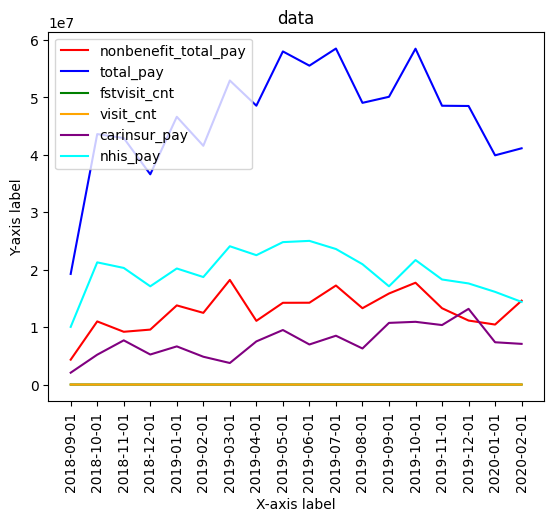

In [38]:
# df = df.set_index('biz_dt')

# Define colors for each column
colors = ['red', 'blue', 'green', 'orange', 'purple', 'cyan']

# Create a figure and axis
fig, ax = plt.subplots()

for i, column in enumerate(df.columns):
    ax.plot(df[column], color=colors[i], linestyle='-', label=column)


ax.set_title('data')
ax.set_xlabel('X-axis label')
ax.set_ylabel('Y-axis label')

# Rotate x-axis labels
plt.xticks(rotation=90)
ax.grid
ax.legend()
plt.show()

In [39]:
df1= csv_reading('/home/fastcampus/Test_model /매출 데이터셋/비급여 총매출.csv/동원한의원 비급여 총매출.csv')
df2= csv_reading('/home/fastcampus/Test_model /매출 데이터셋/총진료비.csv/동원한의원 총진료비.csv')
df = multi_csv(df1,df2)
df3 = csv_reading('/home/fastcampus/Test_model /환자수 데이터셋/신규 환자 수.csv/동원한의원 신규 환자 수.csv')
df = multi_csv(df, df3)
df4 = csv_reading('/home/fastcampus/Test_model /환자수 데이터셋/환자 수.csv/동원한의원 환자 수.csv')
df = multi_csv(df, df4)
df5 = csv_reading('/home/fastcampus/Test_model /매출 데이터셋/자보매출.csv/동원한의원 자보매출.csv')
df6 = csv_reading('/home/fastcampus/Test_model /예약 데이터셋/예약환자 수.csv/동원한의원 예약환자 수.csv')
df7 = csv_reading('/home/fastcampus/Test_model /매출 데이터셋/공단청구금.csv/동원한의원 공단청구금.csv')
df = multi_csv(df, df5)
df = multi_csv(df, df6)
df = multi_csv(df, df7)
# df = df.set_index('biz_dt')
df = df.dropna(subset=['nonbenefit_total_pay', 'total_pay', 'fstvisit_cnt',
       'visit_cnt', 'carinsur_pay', 'nhis_pay'], how='all')
df = df.dropna(axis=1, how='all')
df

,biz_dt,nonbenefit_total_pay,total_pay,fstvisit_cnt,visit_cnt,carinsur_pay,nhis_pay
0,2018-09-01,4334000.0,19266920.0,63.0,486.0,2066220.0,10041500.0
1,2018-10-01,10995500.0,43623480.0,133.0,1090.0,5199170.0,21280650.0
2,2018-11-01,9191110.0,42928860.0,119.0,1095.0,7696440.0,20310120.0
3,2018-12-01,9569550.0,36617990.0,99.0,894.0,5231170.0,17111680.0
4,2019-01-01,13785000.0,46632870.0,104.0,1034.0,6646670.0,20214780.0
5,2019-02-01,12485300.0,41584730.0,87.0,953.0,4845300.0,18725230.0
6,2019-03-01,18221500.0,52955270.0,110.0,1176.0,3751660.0,24087580.0
7,2019-04-01,11094770.0,48567390.0,105.0,1094.0,7515240.0,22531480.0
8,2019-05-01,14238500.0,58018330.0,137.0,1155.0,9496820.0,24805900.0
9,2019-06-01,14250000.0,55539980.0,112.0,1182.0,6978440.0,25023830.0


In [40]:
# 특이점 뽑아보기 kr
def gpt_answer3(msg):

    openai.api_key="sdf"

    answer=[]

    system_prompt =f""" 
                        너는 뛰어난 데이터 분석가야.
                        주어지는 데이터를 보고 그 데이터의 특이점을 찾는 역할이야.
                        데이터의 특이점은 여러가지가 될 수 있어.
                        다음은 특이점의 예시야.
                        - 데이터의 변동값이 이전보다 크게 나타난 곳
                        - 지속적으로 데이터가 보이는 상승값 혹은 하락값과 다르게 나타난 곳
                        - 전체적인 데이터의 흐름을 통해 예상할 수 있는 앞으로의 값

                        위 예시의 특이점들을 기반하여 각 column별 관계도를 파악해 복합적인 특이점을 전달해줘.

                        특이점은 7개로 해줘.

                        Instructions:
                        - 'biz_dt' means '날짜'
                        - 'nonbenefit_total_pay' means '비급여 총매출'
                        - 'total_pay' means '총 매출'
                        - 'visit_cnt' means '환자 수'
                        - 'fstvisit_cnt' means '신규 환자수'
                        - 'carinsur_pay' means '자보매출'
                        - 'nhis_pay' means '공단청구금'

                    
                    """

    completion = openai.ChatCompletion.create(
        model = "gpt-3.5-turbo",
        messages=[{"role": "system", "content": system_prompt},
                    {"role": "user", "content": f"""
                     다음은 해당하는 데이터의 csv 테이블이야. {msg}"""}]
        )

    for choice in completion.choices:
        print(choice['message']['content'])
        answer.append(choice['message']['content'].strip())

In [34]:
gpt_answer3(df)

1. nonbenefit_total_pay 열에서 1월 2019년과 3월 2019년에 큰 증가량이 있음.
2. total_pay 열에서 5월 2019년과 7월 2019년에 증가폭이 큼.
3. visit_cnt 열에서 9월 2019년과 10월 2019년에 큰 증가량이 있음.
4. 전체적으로 비급여 총매출과 총매출이 비슷한 패턴을 가짐.
5. fstvisit_cnt 열에서 5월 2019년부터 7월 2019년까지 증가하는 추세를 보임.
6. carinsur_pay 열은 상승과 하강이 반복됨.
7. nhis_pay 열에서 공단청구금이 큰 폭으로 증가한 3월 2019년과 5월 2019년이 있는데, 이 때 total_pay, visit_cnt, carinsur_pay 등 다른 열에서 뚜렷한 증가량이 나타나지 않는 점이 특이점으로 파악됨.


In [41]:
df

,biz_dt,nonbenefit_total_pay,total_pay,fstvisit_cnt,visit_cnt,carinsur_pay,nhis_pay
0,2018-09-01,4334000.0,19266920.0,63.0,486.0,2066220.0,10041500.0
1,2018-10-01,10995500.0,43623480.0,133.0,1090.0,5199170.0,21280650.0
2,2018-11-01,9191110.0,42928860.0,119.0,1095.0,7696440.0,20310120.0
3,2018-12-01,9569550.0,36617990.0,99.0,894.0,5231170.0,17111680.0
4,2019-01-01,13785000.0,46632870.0,104.0,1034.0,6646670.0,20214780.0
5,2019-02-01,12485300.0,41584730.0,87.0,953.0,4845300.0,18725230.0
6,2019-03-01,18221500.0,52955270.0,110.0,1176.0,3751660.0,24087580.0
7,2019-04-01,11094770.0,48567390.0,105.0,1094.0,7515240.0,22531480.0
8,2019-05-01,14238500.0,58018330.0,137.0,1155.0,9496820.0,24805900.0
9,2019-06-01,14250000.0,55539980.0,112.0,1182.0,6978440.0,25023830.0
